In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            classification_report,\
                            roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [3]:
path=r"C:\Users\shaik\OneDrive\Documents\users\Data Science\ML-python\Preprocessed_data - Preprocessed_data.csv"
data=pd.read_csv(path)
data

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


In [4]:
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=0)
print("Data shape is:",data.shape),
print("X_train shape:",X_train.shape),
print("X_test shape:",X_test.shape),
print("y_test shape:",y_test.shape),
print("_train shape:",y_train.shape)

Data shape is: (4835, 31)
X_train shape: (3868, 30)
X_test shape: (967, 30)
y_test shape: (967,)
_train shape: (3868,)


In [6]:
from scipy import stats # All statistics related

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

- By default Random forest taking

- n_estimators means number of decision trees are **100**

- DT root node method : **Gini**

- To select the features: **sqrt**

- Internally Bootstrap applied: **Bootstrap=True**

- Boot strap means selecting the data with replacement

- We are passing train data but random forest passing only 63% train data only

- The remaining 37% data score is OOB score

- This we can see by enable **OOB=True**

In [7]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
#RFtree.oob_score: False
#RFtree.oob_score_: Error

In [9]:
y_pred_RF=RFtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,auc
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 82.52
F1 is: 0.88
Precision is: 0.85
Recall is: 0.9


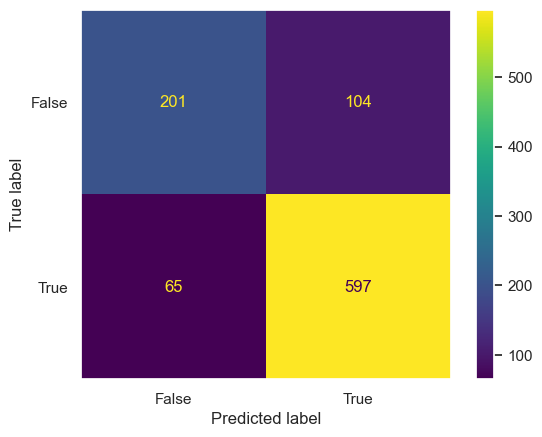

In [10]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

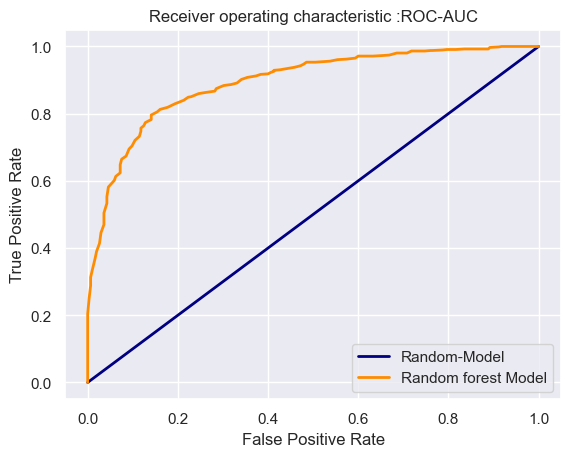

Computed Area Under the Curve (AUC) 0.8933237581100492


In [11]:
#=======================================Step-8: ROC-AUC curve================================================================

y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Random forest Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))

In [12]:
####################################################################################################

## With Hyper parameters

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            classification_report,\
                            roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [15]:
path=r"C:\Users\shaik\OneDrive\Documents\users\Data Science\ML-python\Preprocessed_data - Preprocessed_data.csv"
data=pd.read_csv(path)
data

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


In [16]:
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=0)
print("Data shape is:",data.shape),
print("X_train shape:",X_train.shape),
print("X_test shape:",X_test.shape),
print("y_test shape:",y_test.shape),
print("_train shape:",y_train.shape)

Data shape is: (4835, 31)
X_train shape: (3868, 30)
X_test shape: (967, 30)
y_test shape: (967,)
_train shape: (3868,)


In [18]:
X_test

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
3601,1,26,0,0,33.765893,-117.881533,0,22,4,28.42,1,2,73,0,1,0,0,1,1,1,1,0,1,0,100.65,2415.95,5.01,0,625.24,3036.18
533,1,36,1,0,34.078821,-118.177576,7,69,1,14.18,0,1,16,1,1,0,0,0,0,0,1,1,1,1,53.65,3804.40,0.00,0,978.42,4782.82
666,1,75,1,0,37.290606,-119.216328,6,30,0,33.48,1,2,22,1,1,1,1,1,0,0,1,0,1,0,105.70,3181.80,0.00,0,1004.40,4186.20
4628,0,30,0,0,35.858054,-119.305858,0,3,0,26.26,0,2,30,0,0,0,0,0,0,0,1,0,1,0,69.55,222.30,0.00,0,78.78,301.08
2047,1,36,1,0,34.122501,-117.320138,10,8,5,19.00,0,0,8,0,1,1,0,0,0,0,1,0,1,1,54.75,445.85,0.00,0,152.00,597.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,0,45,1,0,39.884395,-122.587513,1,2,5,7.70,0,2,22,0,0,0,0,0,0,0,0,0,1,0,70.35,120.25,0.00,20,15.40,155.65
900,1,59,0,0,39.847840,-122.544556,0,1,0,28.37,0,1,7,0,0,0,0,0,0,0,0,0,0,0,45.30,45.30,0.00,30,28.37,103.67
933,0,47,0,0,32.857230,-117.209774,0,2,5,10.53,0,2,8,0,0,0,0,1,1,1,1,0,1,0,90.40,168.20,0.00,0,21.06,189.26
2619,0,42,1,0,34.127194,-118.295647,4,18,4,35.96,0,1,17,0,0,0,1,0,0,0,1,0,1,1,50.30,908.75,0.00,0,647.28,1556.03


In [19]:
y_test

3601    1
533     1
666     1
4628    0
2047    1
       ..
3579    1
900     0
933     0
2619    1
1002    1
Name: Customer Status, Length: 967, dtype: int64

## With Hyper parameters
### Step-6

In [20]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier

grid_RF = RandomForestClassifier()
grid_RF

RandomForestClassifier()

In [21]:
grid_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
param_grid ={
    "criterion":['gini','entrop'],  # 2
    "max_depth":[3,4,5,6],  # 6
    "min_samples_split":[2,3,5],# 3
    "min_samples_leaf":[1,2,3,6],# 4
    "random_state":[0,42]# 2
}

In [23]:
grid_search =GridSearchCV(grid_RF,
                          param_grid,
                          scoring='accuracy',
                          cv=5,
                          verbose=True)

In [24]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entrop'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 6],
                         'min_samples_split': [2, 3, 5],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [ ]:
import time
import warnings
warnings.filterwarnings("ignore")


start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("Total time taken is:",(end-start))


Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
accuracy_list=cross_val_score(grid_search.best_estimator_,
                              X_train,
                              y_train,
                              cv=5,
                              scoring='accuracy')
accuracy_list

In [ ]:
accuracy_list.mean()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(criterion='gini',
                                        max_depth =6,
                                        min_samples_leaf=3,
                                        min_samples_split=2,
                                        random_state=0)
RF.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            classification_report,\
                            roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
y_pred_RF = RF.predict(X_test)
y_pred_RF

In [ ]:
print("accuracy_score:",accuracy_score(y_test,y_pred_RF))
print("precision_score:",precision_score(y_test,y_pred_RF))
print("recall_score:",recall_score(y_test,y_pred_RF))
print("f1_score:",f1_score(y_test,y_pred_RF))


## Confusion matrix

In [ ]:
cmt_RF=confusion_matrix(y_test,y_pred_RF) # .ravel() # it will change/ convet  matrics .....linear/line
cmt_RF

In [ ]:
tn,  fp,   fn,    tp =cmt_RF.ravel()

print("The number of True negitives are:",tn)
print("The number of False positive are:",   fp)
print("The number of False negitive are:",fn)
print("The number of True positive are:",tp)

In [ ]:
ac_RF=round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF)*100,2)
pr_RF=round(precision_score(y_test,y_pred_RF)*100,2)
rc_RF=round(recall_score(y_test,y_pred_RF)*100,2)

print(f"accuracy is : {ac_RF}%")
print(f"f1_score is : {f1_RF}%")
print(f"Precision_score is : {pr_RF}%")
print(f"recall_score is : {rc_RF}%")

In [ ]:
import matplotlib.pyplot as plt
ConfusionMatrixDisplay(cmt_RF).plot()
plt.grid(False)

In [ ]:
y_RF_pred_prob = RF.predict_proba(X_test)[:,1]
y_RF_pred_prob

In [ ]:
roc_curve(y_test,y_RF_pred_prob)

In [ ]:
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [ ]:
y_RF_pred_prob = RF.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_RF_pred_prob)

plt.plot([0,1],[0,1],color="navy",lw=2,label='Random-Model')
plt.plot(fpr,tpr,color="yellow",lw=2,label="Random Forest with hyper parameter tuning model")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver operating characteristic : Roc-AUC")
plt.legend()
plt.show()
print("computed Area Under the Curve(AUC)",auc(fpr,tpr))

In [ ]:
auc_RF = auc(fpr,tpr)
auc_RF